             PID PID_TEXT DIV_STATUS  FEATURECOD  STATE_CD TORRENS_TY  \
0  2511723420004      (4)       None         501      2735          A   
1  2511723420005      (5)       None         501      2735          A   
2  2511723420006      (6)       None         501      2735          A   
3  2511723420007      (7)       None         501      2735          A   
4  2511723420020     (20)       None         501       675          A   

   HOUSE_NO FRAC_HOUSE       STREET_NM CONDO_NO  ... QUAL_IMPR4 VET_EXCL4  \
0     19765       None  EXCELSIOR BLVD     None  ...          0         0   
1     19685       None  EXCELSIOR BLVD     None  ...          0         0   
2     19625       None  EXCELSIOR BLVD     None  ...          0         0   
3     19795       None  EXCELSIOR BLVD     None  ...          0         0   
4     19740       None  EXCELSIOR BLVD     None  ...          0         0   

  HMS_EXCL4 NET_TC4 NET_TAX4        LAT        LON    Shape_STAr  Shape_STLe  \
0         0       

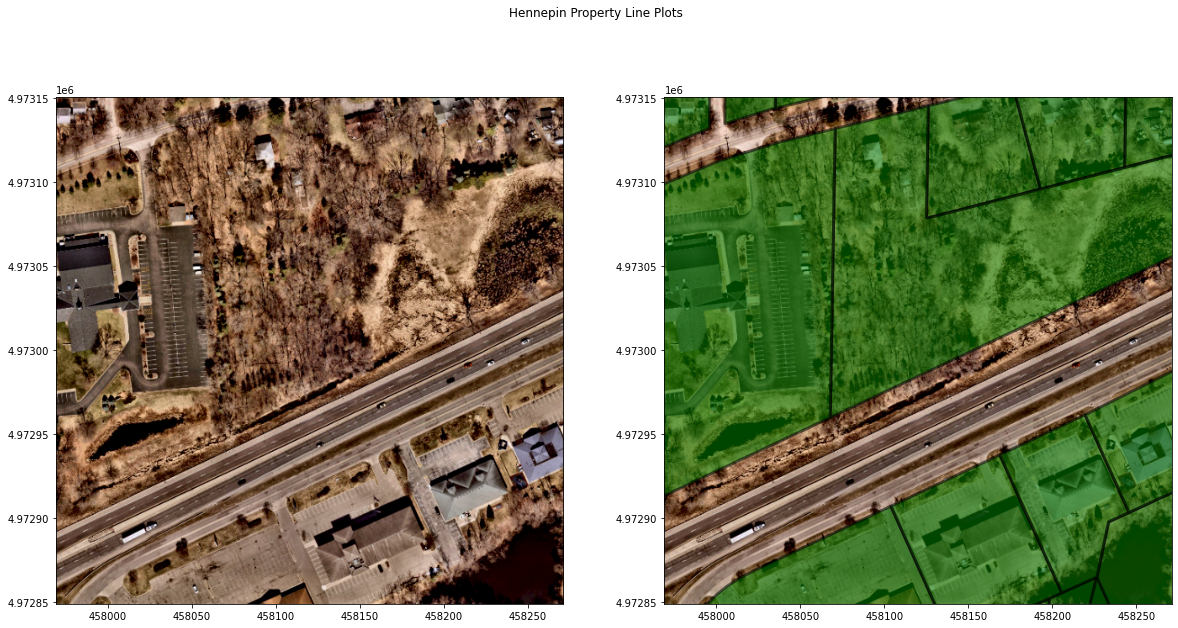

In [4]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


path_to_shapefile = 'hennepin_county_parcels/hennepin_county_parcels.shp'

bbox_df = pd.read_csv('hennepin_bbox.csv')

#Grab one row to get a quick test
row = bbox_df.iloc[3000]
row_bbox = (row['lat_min'], row['lon_min'],row['lat_max'], row['lon_max'])

gdf = gp.read_file(path_to_shapefile, bbox = row_bbox)
print(gdf.head())
print(gdf['TOTAL_MV1'])
gdf = gdf['geometry']
print(gdf.head())

print(row_bbox)

print(row['lat_mid'])
print(row['lon_mid'])

img_path = 'downloads/458120/4973000/458120.000000_4973000.000000.jpg'

img = mpimg.imread(img_path)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Hennepin Property Line Plots')

image_bbox = (row['lat_min'], row['lat_max'],row['lon_min'], row['lon_max'])

gdf.plot(ax = ax2, alpha = 0.55, color = 'g', edgecolor="black", linewidth=3)

ax2.imshow(img, extent = image_bbox, origin = 'upper')
ax1.imshow(img, extent = image_bbox, origin = 'upper')
plt.show()


fig.savefig('image.jpg')
